<a href="https://colab.research.google.com/github/jpshimidt/DataScience/blob/main/EDA/EDA_COVID_BRASIL_VARIANTES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA - DADOS DOS CASOS DE COVID 19 NO BRASIL

###Dados em: [Kaggle](https://www.kaggle.com/yamqwe/omicron-covid19-variant-daily-cases)

##Importação e tratamento dos dados

In [19]:
#Importando Libs para estudos

## Libs para manipulação de dados
import pandas as pd

## Libs para visualização gráfica
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import plotly
import plotly.express as px

In [3]:
#Importando os dados
db = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covid-variants.csv')

In [4]:
#Verificando se o import funcionou (Qtd linhas x Qtd Colunas)
db.shape

(100416, 6)

In [5]:
#Verificando se há valores nulos
db.isnull().sum()

location               0
date                   0
variant                0
num_sequences          0
perc_sequences         0
num_sequences_total    0
dtype: int64

##Criando o DataBase

In [6]:
#Visão do Data Base
db.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [7]:
#Criação Data Frame
df = pd.DataFrame(db)
df

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3
...,...,...,...,...,...,...
100411,Zimbabwe,2021-11-01,Omicron,0,0.0,6
100412,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,2021-11-01,others,0,0.0,6


##Casos no Brasil

In [65]:
# Filtrando para apenas casos Brasil
df_mascara = df['location'] == 'Brazil'

# Substituindo no DataFrame original
Data_Frame = df[df_mascara]
Data_Frame

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
9864,Brazil,2020-05-11,Alpha,0,0.00,311
9865,Brazil,2020-05-11,B.1.1.277,0,0.00,311
9866,Brazil,2020-05-11,B.1.1.302,0,0.00,311
9867,Brazil,2020-05-11,B.1.1.519,0,0.00,311
9868,Brazil,2020-05-11,B.1.160,0,0.00,311
...,...,...,...,...,...,...
10915,Brazil,2021-12-27,Omicron,147,58.33,252
10916,Brazil,2021-12-27,S:677H.Robin1,0,0.00,252
10917,Brazil,2021-12-27,S:677P.Pelican,0,0.00,252
10918,Brazil,2021-12-27,others,0,0.00,252


In [9]:
#Renomear os nomes das colunas e do Data Frame
Data_Frame = Data_Frame.rename(columns={'location': 'Localização' ,'date':'Periodo', 'variant' : 'Variante', 'num_sequences' : 'Número_Casos_Variante',
                                  'perc_sequences' : 'Porcentagem_Casos_Variante', 'num_sequences_total' : 'Total_Casos'})
Data_Frame

,Localização,Periodo,Variante,Número_Casos_Variante,Porcentagem_Casos_Variante,Total_Casos
9864,Brazil,2020-05-11,Alpha,0,0.00,311
9865,Brazil,2020-05-11,B.1.1.277,0,0.00,311
9866,Brazil,2020-05-11,B.1.1.302,0,0.00,311
9867,Brazil,2020-05-11,B.1.1.519,0,0.00,311
9868,Brazil,2020-05-11,B.1.160,0,0.00,311
...,...,...,...,...,...,...
10915,Brazil,2021-12-27,Omicron,147,58.33,252
10916,Brazil,2021-12-27,S:677H.Robin1,0,0.00,252
10917,Brazil,2021-12-27,S:677P.Pelican,0,0.00,252
10918,Brazil,2021-12-27,others,0,0.00,252


In [10]:
Data_Frame.describe()

,Número_Casos_Variante,Porcentagem_Casos_Variante,Total_Casos
count,1056.000000,1056.000000,1056.000000
mean,93.000947,6.126771,2045.909091
std,522.542665,22.435720,1968.807161
min,0.000000,-0.010000,157.000000
25%,0.000000,0.000000,236.250000
50%,0.000000,0.000000,1130.500000
75%,0.000000,0.000000,3885.500000
max,5175.000000,100.000000,5701.000000


###Análise das principais variantes

In [56]:
#Filtrando por casos
Data_Frame_Omicron = Data_Frame[Data_Frame.Variante == 'Omicron']
Data_Frame_Alpha = Data_Frame[Data_Frame.Variante == 'Alpha']
Data_Frame_Beta = Data_Frame[Data_Frame.Variante == 'Beta']
Data_Frame_Delta = Data_Frame[Data_Frame.Variante == 'Delta']
Data_Frame_Gamma = Data_Frame[Data_Frame.Variante == 'Gamma']
Data_Frame_Others = Data_Frame[Data_Frame.Variante == 'others']

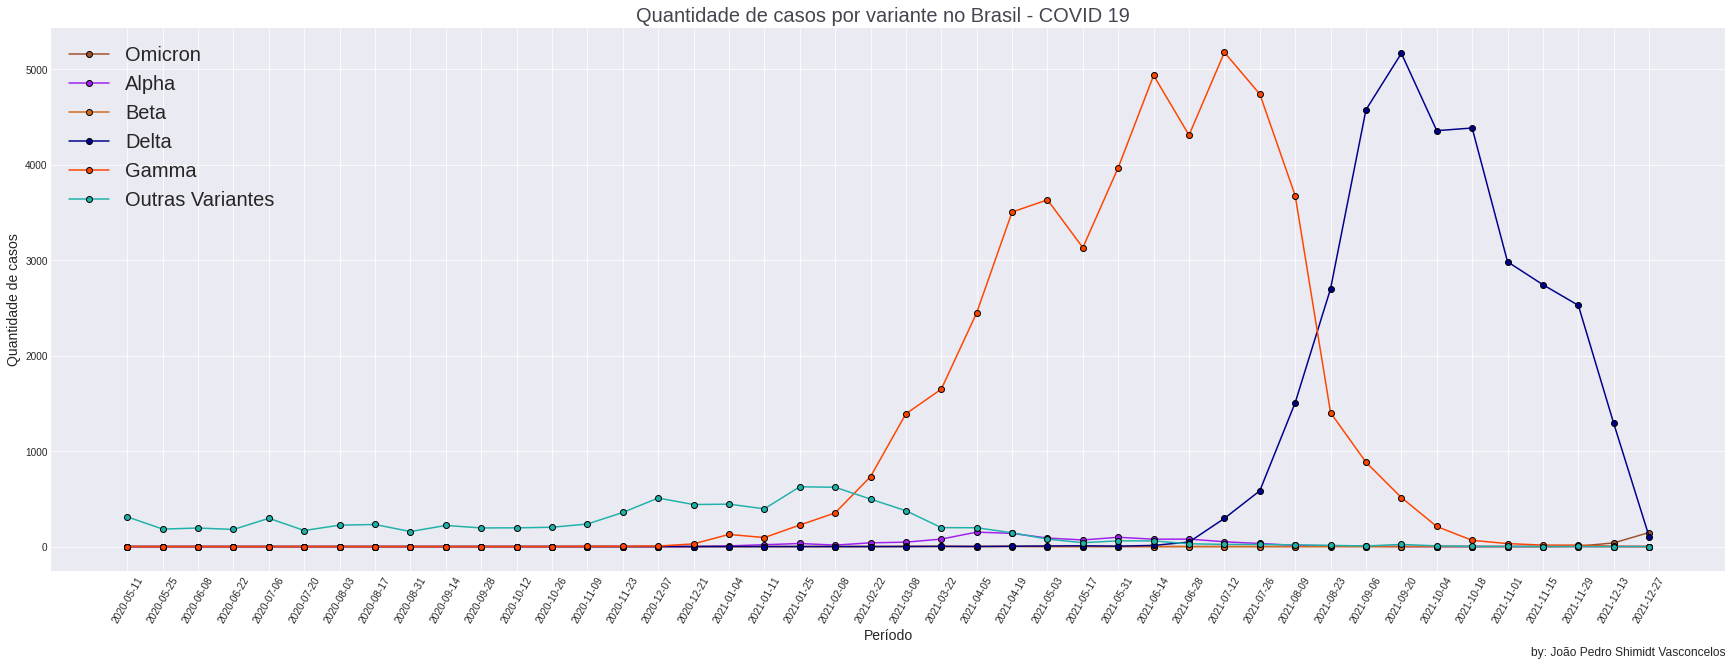

In [58]:
from numpy.core.fromnumeric import size

# Alterar o style do matplot
plt.style.use('seaborn-darkgrid')

# Alterar tamanho
plt.figure( figsize=(30, 10) )

# Plotar Omicron
plt.plot( Data_Frame_Omicron['Periodo'], Data_Frame_Omicron['Número_Casos_Variante'], color='#A0522D', marker='o', markeredgecolor='black' )

# Plotar Alpha
plt.plot( Data_Frame_Alpha['Periodo'], Data_Frame_Alpha['Número_Casos_Variante'], color='#A020F0', marker='o', markeredgecolor='black' )

# Plotar Beta
plt.plot( Data_Frame_Beta['Periodo'], Data_Frame_Beta['Número_Casos_Variante'], color='#D2691E', marker='o', markeredgecolor='black' )

# Plotar Delta
plt.plot( Data_Frame_Delta['Periodo'], Data_Frame_Delta['Número_Casos_Variante'], color='#00008B', marker='o', markeredgecolor='black' )

# Plotar Gamma
plt.plot( Data_Frame_Gamma['Periodo'], Data_Frame_Gamma['Número_Casos_Variante'], color='#FF4500', marker='o', markeredgecolor='black' )

# Plotar Others
plt.plot( Data_Frame_Others['Periodo'], Data_Frame_Others['Número_Casos_Variante'], color='#20B2AA', marker='o', markeredgecolor='black' )

# Labels
plt.xlabel('Período', fontsize=14)
plt.xticks(rotation=60)
plt.ylabel('Quantidade de casos', fontsize=14)

# Legenda
plt.legend( ['Omicron', 'Alpha', 'Beta', 'Delta', 'Gamma', 'Outras Variantes'], fontsize=20 )

# titulo
plt.title('Quantidade de casos por variante no Brasil - COVID 19  ', loc='center', fontsize=20, color='#474350' )

# Anotação
plt.annotate(
    'by: João Pedro Shimidt Vasconcelos',
    xy = (1.0, -0.15),
    xycoords='axes fraction',
    ha = 'right',
    va = 'center',
    fontsize=12
);

In [66]:
#Função Plotagem de gráfico 
def plotarVariante(x,y,color,titulo):
  plt.style.use('seaborn-darkgrid')
  plt.figure( figsize=(30, 10) )
  plt.plot(x, y, color=color, marker='o', markeredgecolor='black' )
  plt.xlabel('Período', fontsize=14)
  plt.xticks(rotation=60)
  plt.ylabel('Quantidade de casos', fontsize=14)
  plt.title(titulo, loc='center', fontsize=20, color='#474350' )


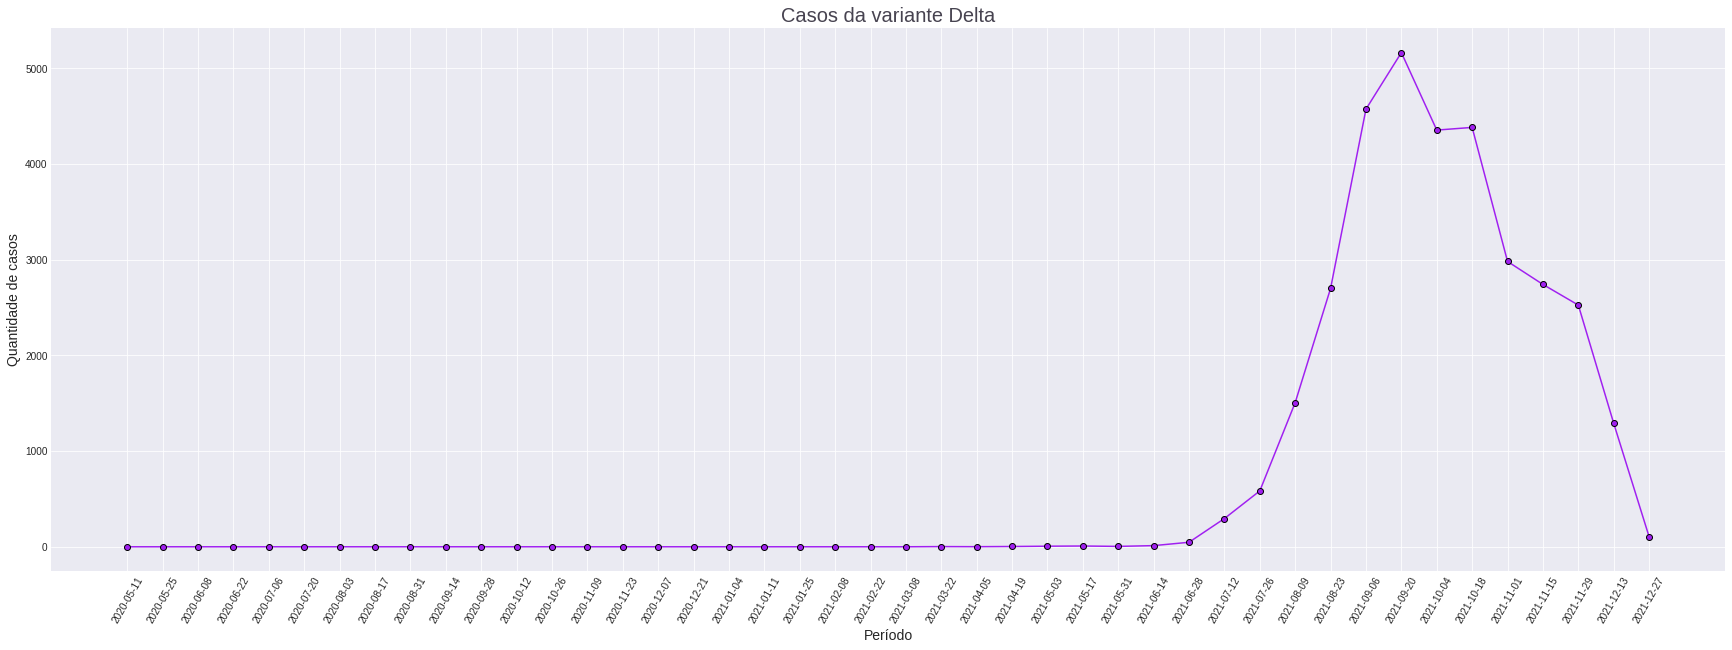

In [68]:
#Plotagem - Variante Delta
plotarVariante(Data_Frame_Delta['Periodo'], Data_Frame_Delta['Número_Casos_Variante'],'#A020F0', 'Casos da variante Delta') 

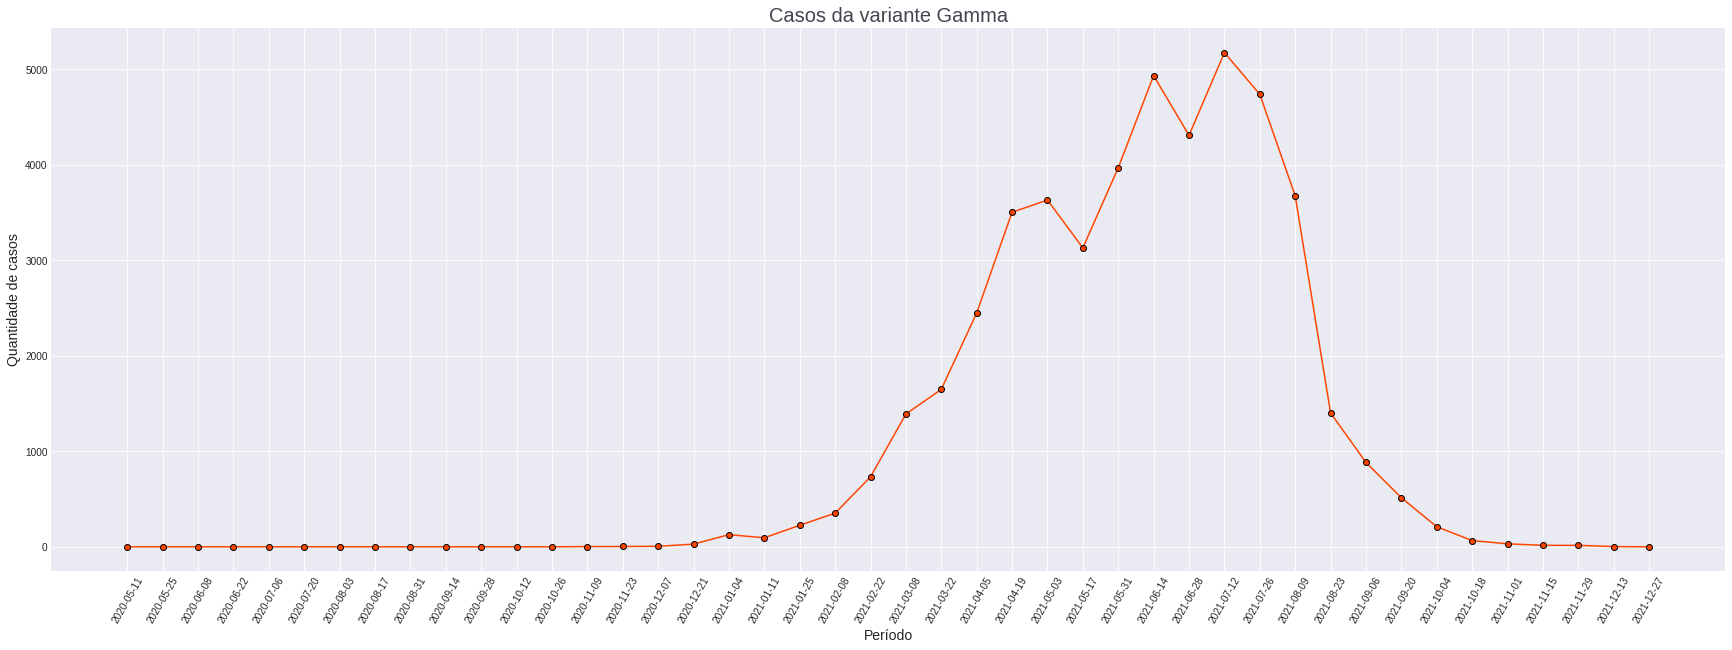

In [69]:
#Plotagem - Variante Gamma
plotarVariante(Data_Frame_Gamma['Periodo'], Data_Frame_Gamma['Número_Casos_Variante'],'#FF4500', 'Casos da variante Gamma') 

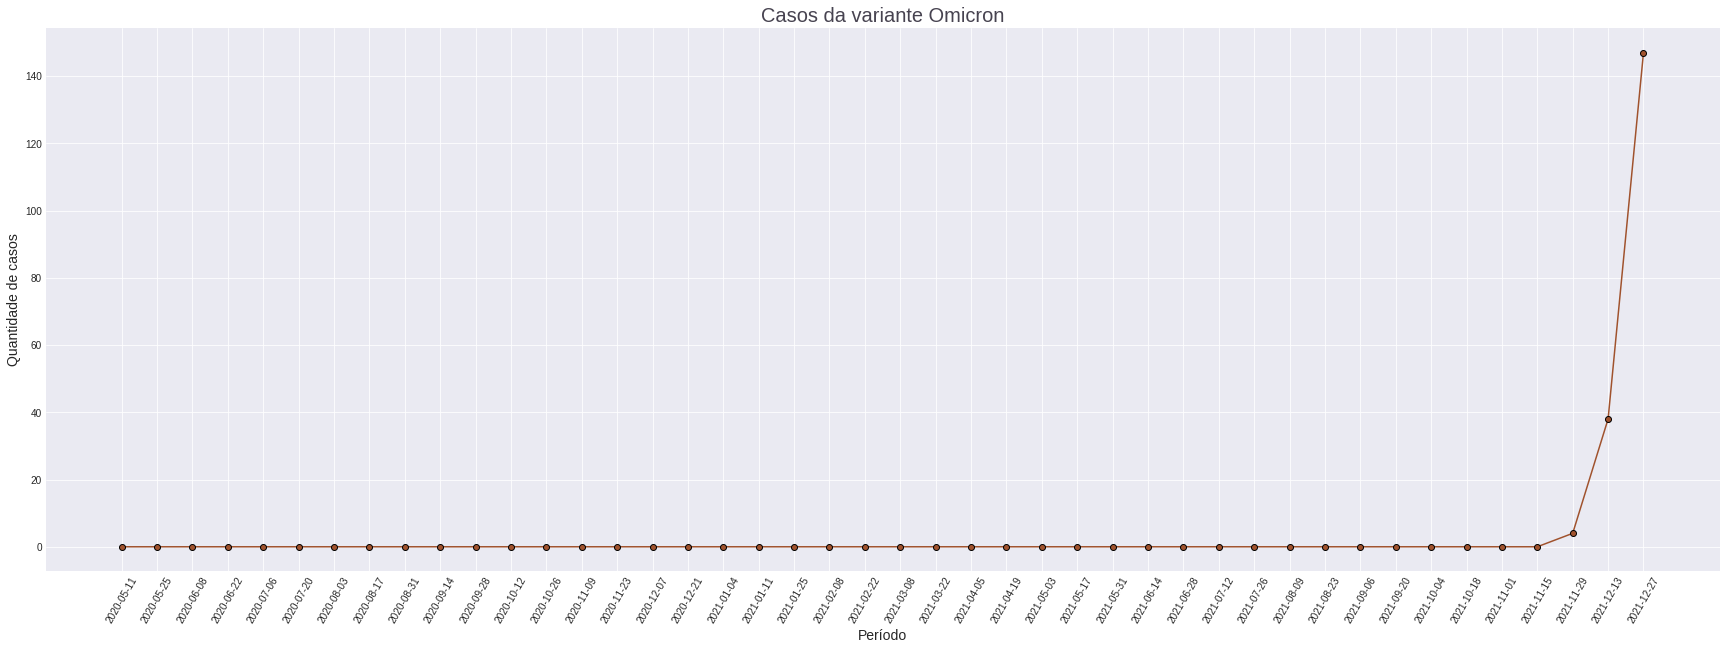

In [70]:
#Plotagem - Variante Omicron
plotarVariante(Data_Frame_Omicron['Periodo'], Data_Frame_Omicron['Número_Casos_Variante'],'#A0522D', 'Casos da variante Omicron') 